<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Dog_Breed_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 7.7 MB/s 
     |████████████████████████████████| 189 kB 48.8 MB/s 
     |████████████████████████████████| 1.2 MB 41.5 MB/s 
     |████████████████████████████████| 48 kB 3.7 MB/s 
     |████████████████████████████████| 55 kB 5.0 MB/s 
     |████████████████████████████████| 51 kB 418 kB/s 
     |████████████████████████████████| 561 kB 67.9 MB/s 
     |████████████████████████████████| 130 kB 74.2 MB/s 


In [2]:
import fastbook

In [3]:
fastbook.setup_book()

Mounted at /content/gdrive


In [4]:
from fastai.vision.all import *

In [5]:
path = untar_data(URLs.PETS)

In [6]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [9]:
images = (path/'images').ls()

In [10]:
images

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_187.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_127.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_98.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_92.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_140.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_100.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_22.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_152.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_165.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_83.jpg')...]

In [11]:
fnname = images[0]

In [14]:
fnname

Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_187.jpg')

In [15]:
file = (path/'images').ls()

In [16]:
fname = file[0]

In [17]:
fname

Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_187.jpg')

In [20]:
#re.findall(r'(.+)_\d+.jpg$', fname)

In [33]:
pets = DataBlock(blocks = (ImageBlock,CategoryBlock),
                 get_items =get_image_files,
                 splitter = RandomSplitter(seed=42),
                 get_y = using_attr(RegexLabeller("(.+)_\d+.jpg$"), "name"),
                 item_tfms=Resize(460),
                 batch_tfms = aug_transforms(size = 224, min_scale=0.75),
                 )
dls = pets.dataloaders(path/'images')

Presizing is a way of doing image augmentation that is designed to minimize data destruction while maintaining good performance

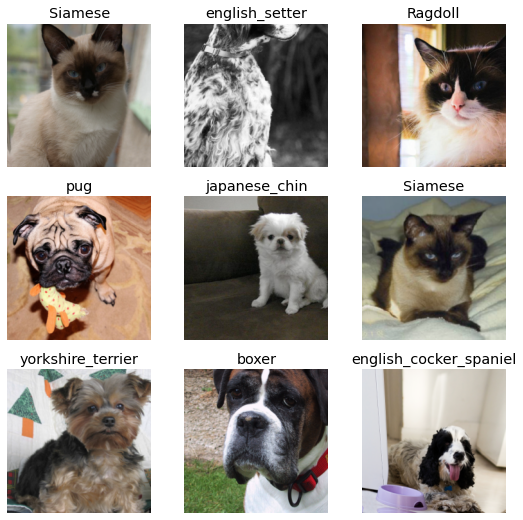

In [34]:
dls.show_batch()